In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
df = pd.read_csv('../../DataSets/mnist_train.csv')
data = df.values
print data.shape

(17596, 785)


In [3]:
labels = data[:6000, 0]
features = data[:6000, 1:]
print labels.shape, features.shape
print np.unique( labels )
labels =  np_utils.to_categorical(labels)
print labels.shape

(6000,) (6000, 784)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
(6000, 10)


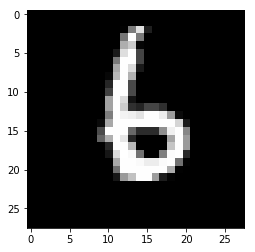

In [4]:
n = np.random.choice( features.shape[0] )
img = features[n].reshape( (28,28) )
plt.imshow( img, cmap='gray' )
plt.show()

In [5]:
split = int( 0.8*( features.shape[0] ) )
train_features = features[ :split ]/255.0
train_labels = labels[ :split ]
test_features = features[ split: ]/255.0
test_labels = labels[ split: ]

print train_features.shape, train_labels.shape, test_features.shape, test_labels.shape

(4800, 784) (4800, 10) (1200, 784) (1200, 10)


In [6]:
model = Sequential()

In [7]:
model.add( Dense( 128, input_shape = (784,) ) )
model.add( Activation('relu') )


model.add( Dense( 10 ) )
model.add( Activation('softmax') )

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 128)           100480      dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 128)           0           dense_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 10)            1290        activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 10)            0           dense_2[0][0]                    
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
___________________

In [8]:
model.compile( optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )

In [9]:
model.fit( train_features, train_labels, batch_size=15, nb_epoch=20, validation_data=( test_features, test_labels )  )

Train on 4800 samples, validate on 1200 samples
Epoch 1/20
4800/4800 [==============================] - 2s - loss: 0.5890 - acc: 0.8394 - val_loss: 0.3613 - val_acc: 0.8958
Epoch 2/20
4800/4800 [==============================] - 1s - loss: 0.2580 - acc: 0.9254 - val_loss: 0.2909 - val_acc: 0.9175
Epoch 3/20
4800/4800 [==============================] - 1s - loss: 0.1789 - acc: 0.9490 - val_loss: 0.2471 - val_acc: 0.9292
Epoch 4/20
4800/4800 [==============================] - 1s - loss: 0.1287 - acc: 0.9656 - val_loss: 0.2558 - val_acc: 0.9192
Epoch 5/20
4800/4800 [==============================] - 1s - loss: 0.0978 - acc: 0.9738 - val_loss: 0.2031 - val_acc: 0.9400
Epoch 6/20
4800/4800 [==============================] - 1s - loss: 0.0704 - acc: 0.9829 - val_loss: 0.1951 - val_acc: 0.9417
Epoch 7/20
4800/4800 [==============================] - 1s - loss: 0.0508 - acc: 0.9902 - val_loss: 0.1975 - val_acc: 0.9483
Epoch 8/20
4800/4800 [==============================] - 1s - loss: 0.0405 - a

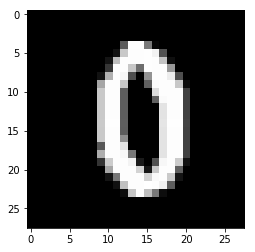

In [23]:
n = np.random.choice( features.shape[0] )
img = features[n].reshape( (28,28) )
plt.imshow( img, cmap='gray' )
plt.show()


In [24]:
predict_image = features[n].reshape( (-1,1) )
predict_image = predict_image.T/255.0
res = model.predict( predict_image, batch_size=15 )
max_ind = res.argmax()
print "Predicted Value is", max_ind, "with confidence", 100*res[0][max_ind]
print "Real Value is ", int(data[n][0])

Predicted Value is 0 with confidence 99.958974123
Real Value is  0


In [12]:
#model.save( 'Digit_Recognition_Model.h5' )